### Import

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import imageio
import pickle
import json
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from PIL import Image
from sklearn.decomposition import PCA
from keras.models import Model
from keras.layers import Input, Reshape, Dense, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses

### Read MINST

In [21]:
(Xtrain, ytrain), (Xtest, ytest) = tf.keras.datasets.mnist.load_data()
Xtrain = Xtrain / 255.0
Xtest = Xtest / 255.0

### View a few examples

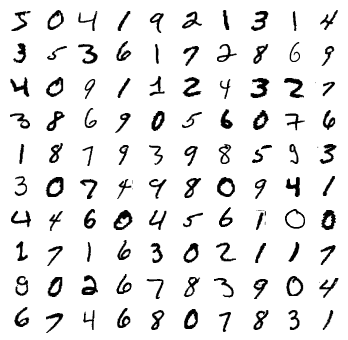

In [22]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    digit = Xtrain[idx]
    ax.imshow(digit,cmap=plt.cm.binary)
    ax.axis("off")

### Parameters

In [23]:
latent_dim = 10

### Define Autoencoder Model

In [30]:
class Autoencoder(Model):
    
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim*2, activation='relu'),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(784, activation='sigmoid'),
            layers.Reshape((28, 28))
    ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

### Create Model

In [31]:
autoencoder = Autoencoder(latent_dim) 
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

### Fit Model

In [34]:
history = autoencoder.fit(Xtrain, Xtrain, verbose=2, batch_size=128, epochs=100)

### Plot Loss

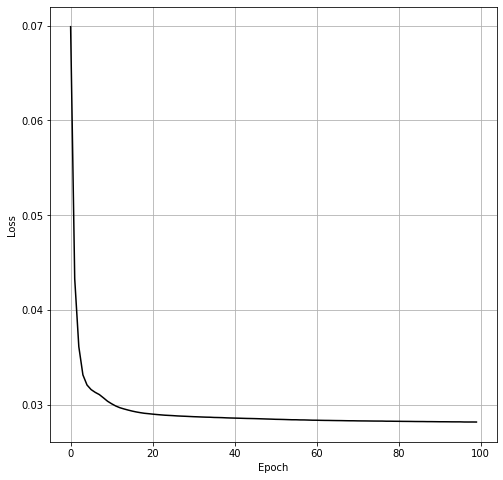

In [40]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'],'k');
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.grid();

### Predict Test

In [45]:
ypred = autoencoder.predict(Xtest)

### Visualize

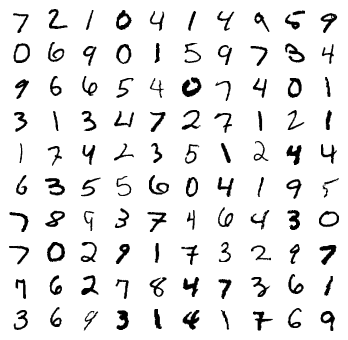

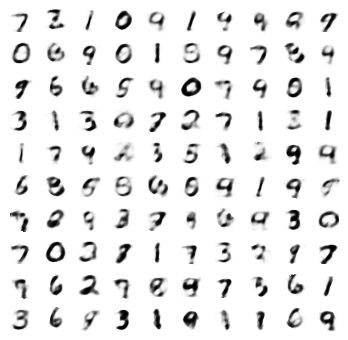

In [46]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    digit = Xtest[idx]
    ax.imshow(digit,cmap=plt.cm.binary)
    ax.axis("off")
    
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    digit = ypred[idx]
    ax.imshow(digit,cmap=plt.cm.binary)
    ax.axis("off")    